# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Possible Biases](#possible-biases)


## Dataset Overview

The source of the raw dataset is: https://www.kaggle.com/datasets/kushagra3204/wheat-plant-diseases.
As shown in the plots below the dataset contains images of different shapes aswell as poor quality and misleading images.
The balance of the classes is also not equal.


['Aphid', 'Black Rust', 'Blast', 'Brown Rust', 'Common Root Rot', 'Fusarium Head Blight', 'Healthy', 'Leaf Blight', 'Mildew', 'Mite', 'Septoria', 'Smut', 'Stem fly', 'Tan spot', 'Yellow Rust']


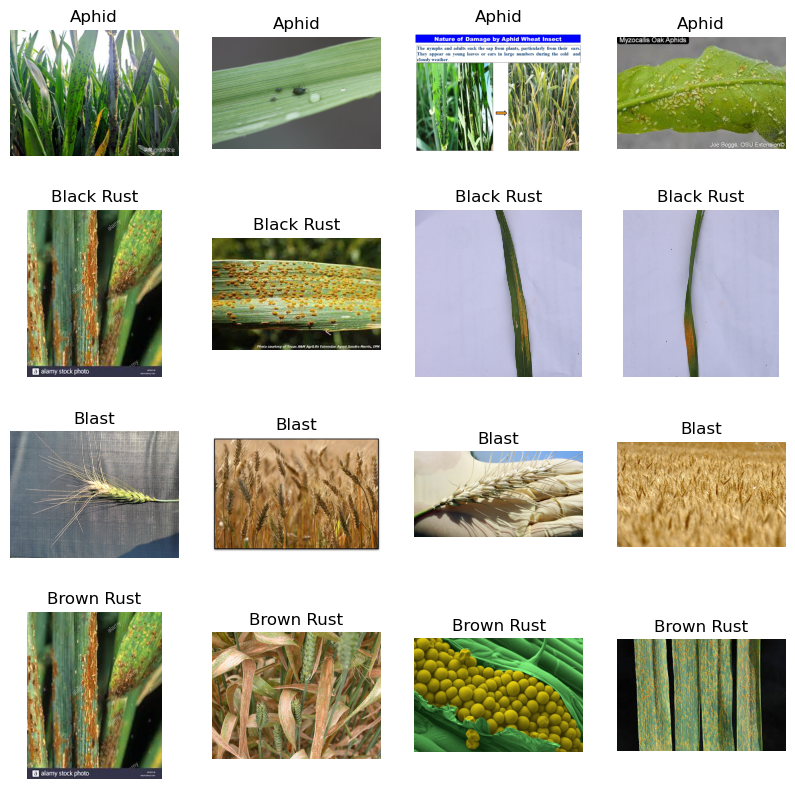

In [35]:
from skimage.transform import resize
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os
# Display some images


train_dir = '../Dataset/data/train/'
datadirs = os.listdir(train_dir)
print(datadirs)
fig, ax = plt.subplots(4, 4, figsize=(10, 10))
for i in range(4):
    for j in range(4):
        img = train_dir + datadirs[i]+ '/'+os.listdir(train_dir + datadirs[i])[j*2]
        image = imageio.imread(img)
        ax[i, j].imshow(image)
        ax[i, j].set_title(datadirs[i])
        ax[i, j].axis('off')
img = train_dir + datadirs[0]+ '/'+os.listdir(train_dir + datadirs[0])[0]
image = imageio.imread(img)

Some of the images depict shematics, while others are pictures of the actual plants. Picture 2 and 4 of column 1 are also identical. This means it is contained in both labels. 

## Possible Biases

We investigated a bias due to class imbalance


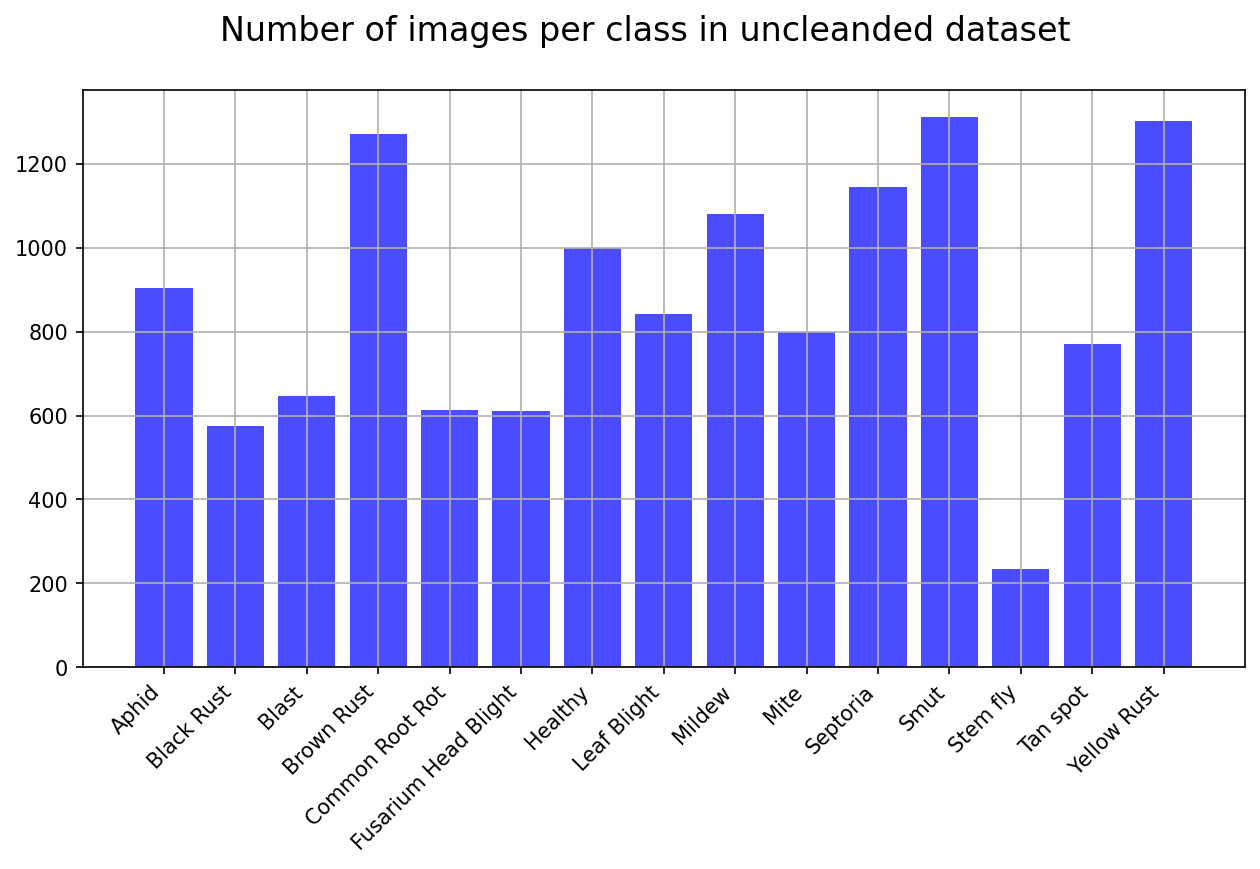

In [36]:

num_images = []
for dir in datadirs:
    num_images.append(len(os.listdir(train_dir + dir)))
x = range(len(datadirs))
fig = plt.figure(figsize=(10, 5),dpi = 150)
plt.grid()
fig.suptitle('Number of images per class in uncleanded dataset', fontsize=16)
plt.bar(datadirs,num_images, color='blue', alpha=0.7)
#plt.xticks(x,datadirs,rotation=45,ha = 'right')
plt.xticks(rotation=45,ha = 'right')
plt.show()

This lead us to clean the dataset and rescale all the images to a uniform size of 256*256 pixels.

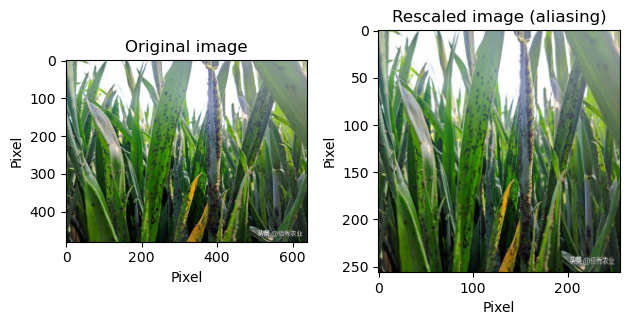

In [37]:
img = train_dir + datadirs[0]+ '/'+os.listdir(train_dir + datadirs[0])[0]
image_resized = resize(
    image, (256, 256), anti_aliasing=True
)

# Get the pixel values as a numpy array


# Print the pixel values
fig, axes = plt.subplots(nrows=1, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")
ax[0].set_xlabel('Pixel')
ax[0].set_ylabel('Pixel')
ax[1].imshow(image_resized, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")
ax[1].set_xlabel('Pixel')
ax[1].set_ylabel('Pixel')

plt.tight_layout()
plt.show()


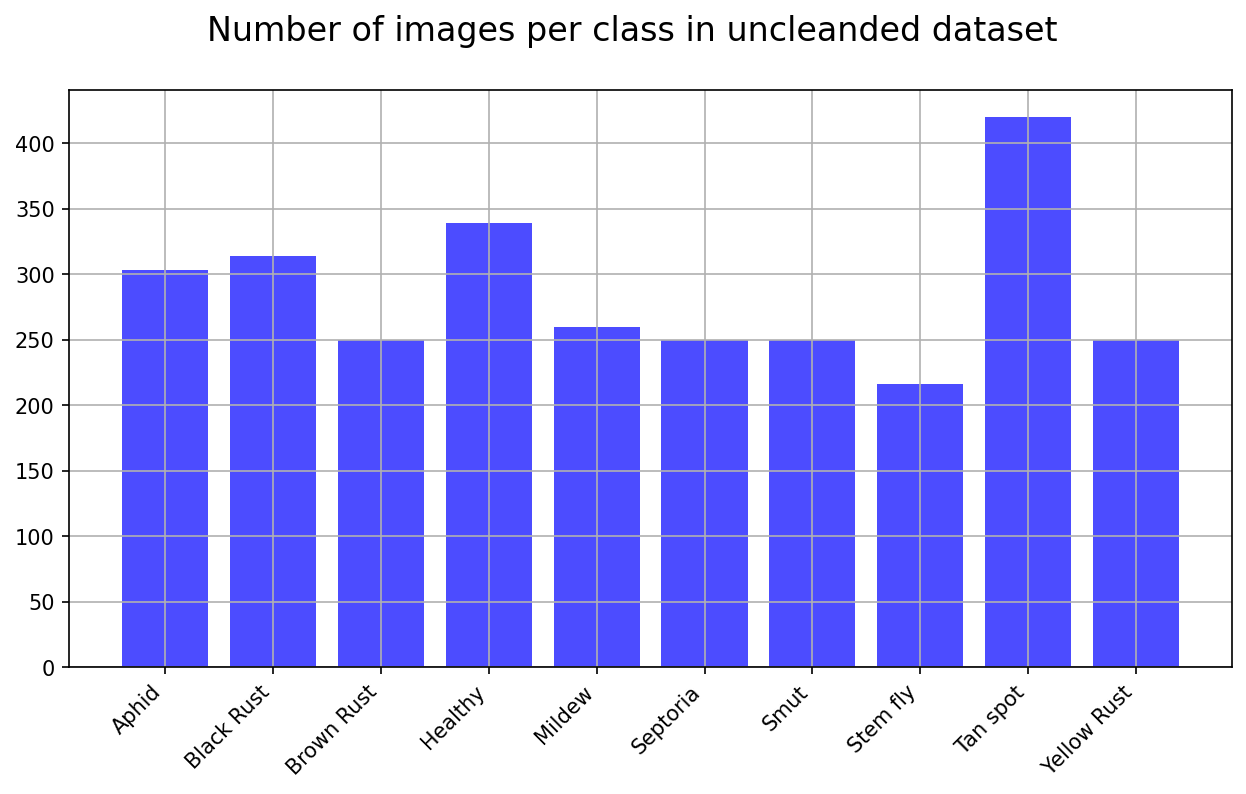

In [38]:
cleanded_dir = '../Dataset/train_cleaned_scaled/train/'
datadirs = os.listdir(cleanded_dir)
num_images = []
for dir in datadirs:
    num_images.append(len(os.listdir(cleanded_dir + dir)))
x = range(len(datadirs))
fig = plt.figure(figsize=(10, 5),dpi = 150)
plt.grid()
fig.suptitle('Number of images per class in uncleanded dataset', fontsize=16)
plt.bar(datadirs,num_images, color='blue', alpha=0.7)
#plt.xticks(x,datadirs,rotation=45,ha = 'right')
plt.xticks(rotation=45,ha = 'right')
plt.show()

In the cleaned dataset we tried our best to get rid of ambiguously labled images aswell as those containing a lot of other content apart from the real life image. Also the class imbalance is a bit better now with only tan spot being overly represented.